<a href="https://colab.research.google.com/github/Non8q/IT326-Adult-Census-Income/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> **Phase 2**

#**Part 1 : Data Analysis**


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('adult.csv')

df.replace('?', np.nan, inplace=True)

# **Statistical Summaries Description**

In [72]:
print(" Statistical Summary for Numeric Attributes:")
df.describe()

 Statistical Summary for Numeric Attributes:


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



 This table provides the five-number summary for all numeric attributes to examine the data distribution and overall spread.

 The analysis reveals high dispersion and significant outliers, particularly in Capital Gain and Capital Loss, where values jump from 0 to 99,999, indicating a highly skewed distribution. Additionally, the Age variable shows a wide diversity, ranging from 17 to 90 years

 These findings confirm the necessity of applying Feature Scaling and Normalization. This step will unify the data ranges and prevent the algorithms from being biased toward attributes with larger numerical values, thereby ensuring higher predictive accuracy.

# **Missing Values Analysis Description**


In [62]:
print("\nMissing Values Analysis:")
display(df.isnull().sum())


Missing Values Analysis:


,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0



Description: This section analyzes the missing data identified after replacing the "?" placeholder with standard NaN values

 We discovered missing values in three critical features: Workclass (1,836), Occupation (1,843), and Native Country (583)

Decision (Preprocessing): Given the importance of these attributes for the classification task, we decided to perform Data Cleaning (such as removing records or imputation) to handle these gaps.

# **Outlier Detection**


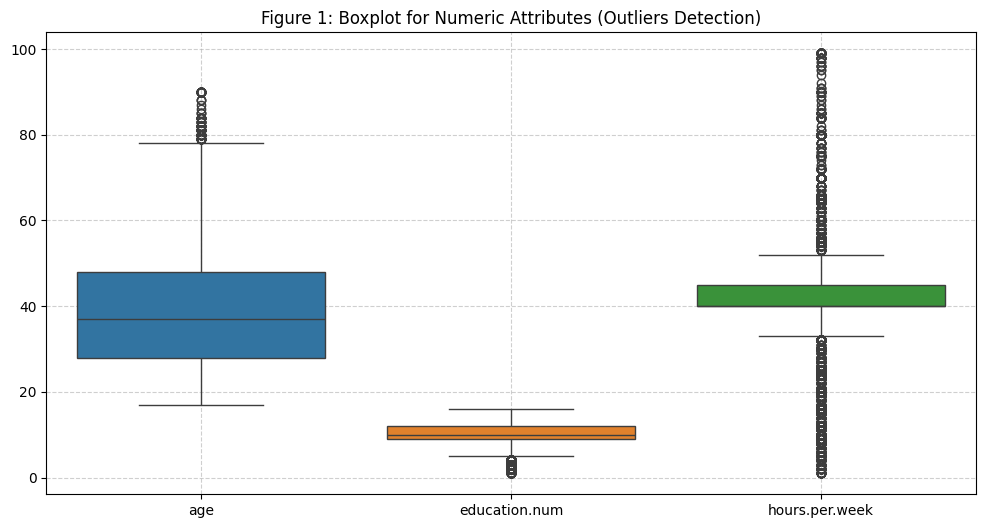

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'education.num', 'hours.per.week']])
plt.title('Figure 1: Boxplot for Numeric Attributes (Outliers Detection)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


 This boxplot visualizes the distribution and identifies potential outliers within three key numeric attributes: age, education.num, and hours.per.week. The central box represents the interquartile range (IQR), while the points beyond the "whiskers" indicate the outlying data points.

 The plot clearly shows a significant number of outliers in the age and hours.per.week variables. For instance, many individuals work far more or fewer hours than the standard 40-hour week, and some individuals are much older than the median age of the sample.


Preprocessing Decision: This visualization helped us decide that outlier handling is necessary during the preprocessing phase. Addressing these extreme values will prevent them from distorting the decision boundaries of our classification models, such as the Decision Tree, ensuring more generalized and accurate results

# **Histogram (Age Distribution)**

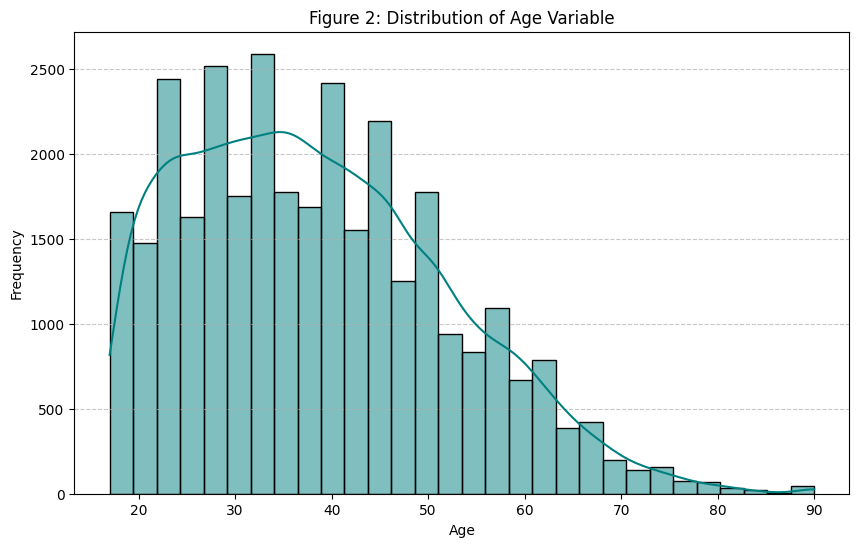

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30, color='teal')
plt.title('Figure 2: Distribution of Age Variable')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This histogram represents the frequency distribution of the age attribute, with a Kernel Density Estimate (KDE) line overlaid to show the overall shape of the data.

 The plot indicates that the age distribution is right-skewed, meaning a larger portion of the population in the dataset consists of younger individuals (aged 20-45). There is a noticeable decrease in frequency as age increases beyond 50.

# **Bar Plot (Income Distribution)**

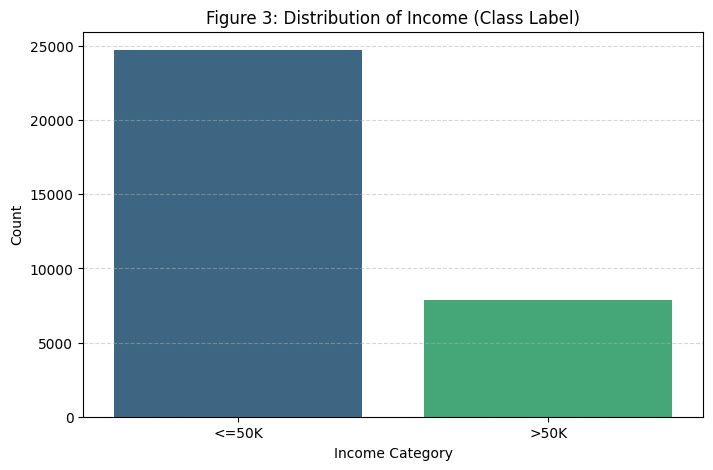

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(x='income', data=df, hue='income', palette='viridis', legend=False)
plt.title('Figure 3: Distribution of Income (Class Label)')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

This plot shows the count of individuals in each income category.

 which is the income attribute, showing the number of instances for both categories: <=50K and >50K.

 The plot reveals a clear class imbalance in the dataset. The number of individuals earning less than or equal to $50,000 is significantly higher than those earning more than 50,000.

Identifying this imbalance is crucial for our next steps. we must use evaluation metrics beyond just simple accuracy, such as the F1-score or Confusion Matrix, to ensure the model isn't biased toward the majority class

# **Part 2: Data Preprocessing**

In [66]:
# 1. Creating a copy of the raw dataset
df_preprocessed = df.copy()
# Snapshot of the raw dataset as required
df.head()



,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### **Task 1: Data Cleaning (Handling Missing Values)**

In [67]:
# We drop rows with missing values
df_preprocessed.dropna(inplace=True)

# Display results to verify
print(f"Total records in Raw Data: {len(df)}")
print(f"Total records after Cleaning: {len(df_preprocessed)}")
print("\nSnapshot of the Preprocessed Data (After Task 1):")
df_preprocessed.head()

Total records in Raw Data: 32561
Total records after Cleaning: 30162

Snapshot of the Preprocessed Data (After Task 1):


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K




Description: In this step, we handle the missing values identified during the Data Analysis phase.

Why/Justification: Our analysis showed missing values in the workclass (1,836), occupation (1,843), and native.country (583) attributes. We decided to use the dropna() method to remove these records to ensure the data mining model (Decision Tree) is built on complete and accurate information.

Improvement: This technique improves the dataset by removing incomplete records (noise), which leads to more reliable classification results.

Attributes involved: workclass, occupation, and native.country.

### **Task 2: Variable Transformation (Label Encoding)**

In [68]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation',
                       'relationship', 'race', 'sex', 'native.country', 'income']

# Applying Label Encoding to the preprocessed copy
for col in categorical_columns:
    df_preprocessed[col] = le.fit_transform(df_preprocessed[col])

# Display a snapshot to verify the transformation
print("Snapshot of the Preprocessed Data (After Label Encoding):")
df_preprocessed.head()

Snapshot of the Preprocessed Data (After Label Encoding):


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0




Description: In this step, we convert all categorical (text-based) attributes into a numerical format.

Why/Justification: Most machine learning algorithms, including the Decision Tree we plan to use in Phase 3, require numerical input to perform mathematical calculations. We used the LabelEncoder from the sklearn library to map each unique category to a specific integer.

Improvement: This transformation makes the nominal and ordinal data compatible with data mining algorithms while preserving the unique characteristics of each category.

Attributes involved: workclass, education, marital.status, occupation, relationship, race, sex, native.country, and the class label income.

### **Task 3: Feature Scaling (Normalization)**

In [69]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# List of numeric columns that need scaling
numeric_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Apply scaling to the preprocessed copy
df_preprocessed[numeric_features] = scaler.fit_transform(df_preprocessed[numeric_features])

print("Final Preprocessed Data Snapshot (After Scaling):")
df_preprocessed.head()


Final Preprocessed Data Snapshot (After Scaling):


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,3.316630,2,-0.538790,11,-0.439738,6,3,1,4,0,-0.147445,10.555814,-1.914161,38,0
3,1.184831,2,-0.467906,5,-2.400559,0,6,4,4,0,-0.147445,9.427915,-0.077734,38,0
4,0.195067,2,0.708645,15,-0.047574,5,9,3,4,0,-0.147445,9.427915,-0.077734,38,0
5,-0.337883,2,0.256222,11,-0.439738,0,7,4,4,0,-0.147445,9.106365,0.339636,38,0
6,-0.033340,2,-0.370964,0,-1.616231,5,0,4,4,1,-0.147445,9.106365,-0.077734,38,0




Description: This step involves scaling the numeric attributes to a standard range.

Why/Justification: Our initial statistical analysis showed a high dispersion and different scales among numeric attributes. For example, capital.gain has a much larger range than age. We applied Standardization (StandardScaler) to ensure each feature contributes equally to the model's performance.

Improvement: This technique prevents attributes with large numerical values from dominating the distance-based calculations in algorithms like K-means and helps the Decision Tree find better split points.

Attributes involved: age, fnlwgt, education.num, capital.gain, capital.loss, and hours.per.week.

In [70]:
df_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)

print("Preprocessed Dataset Snapshot:")
df_preprocessed.head()

Preprocessed Dataset Snapshot:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,3.316630,2,-0.538790,11,-0.439738,6,3,1,4,0,-0.147445,10.555814,-1.914161,38,0
3,1.184831,2,-0.467906,5,-2.400559,0,6,4,4,0,-0.147445,9.427915,-0.077734,38,0
4,0.195067,2,0.708645,15,-0.047574,5,9,3,4,0,-0.147445,9.427915,-0.077734,38,0
5,-0.337883,2,0.256222,11,-0.439738,0,7,4,4,0,-0.147445,9.106365,0.339636,38,0
6,-0.033340,2,-0.370964,0,-1.616231,5,0,4,4,1,-0.147445,9.106365,-0.077734,38,0
